In [5]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
!gdown 1VcLR7TKzJlEyNJIZtD3LL14JU1SMfL5t

Downloading...
From: https://drive.google.com/uc?id=1VcLR7TKzJlEyNJIZtD3LL14JU1SMfL5t
To: /content/mckinsey.csv
100% 83.8k/83.8k [00:00<00:00, 3.20MB/s]


In [7]:
data = pd.read_csv('mckinsey.csv')
data.head(6)

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106
5,Afghanistan,1977,14880372,Asia,38.438,786.113360


In [8]:
data_df=pd.DataFrame(data)

Initial Analysis

In [9]:
data_df.columns

Index(['country', 'year', 'population', 'continent', 'life_exp', 'gdp_cap'], dtype='object')

We have the below mentioned coloumn
Country
Year
Population
Continent
Life Exp
Gdp Capita

In [10]:
data_df.dtypes

,0
country,object
year,int64
population,int64
continent,object
life_exp,float64
gdp_cap,float64


The Values present in the coloumns are as of below mentioned types
Country => object
Year=> Int
Population => Int
Continent => Object
Life_exp => Float
GDP_CAP => Float

In [11]:
data_df.isna().value_counts()

,,,,,,count
country,year,population,continent,life_exp,gdp_cap,
False,False,False,False,False,False,1704


There is no null values

In [12]:
data_df.duplicated().value_counts()

,count
False,1704


Since everything is false there are no duplicates present in the data set.

In [13]:
data_df['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

we have 5 different continents in the data

1) Analysis with respect to the Continent

In [14]:
continentdata_df = data_df.groupby('continent')[['life_exp', 'gdp_cap', 'population']].agg({'life_exp': 'mean', 'gdp_cap': 'mean','population': 'mean' })
continentdata_df

,life_exp,gdp_cap,population
continent,,,
Africa,48.865330,2193.754578,9.916003e+06
Americas,64.658737,7136.110356,2.450479e+07
Asia,60.064903,7902.150428,7.703872e+07
Europe,71.903686,14469.475533,1.716976e+07
Oceania,74.326208,18621.609223,8.874672e+06


Population in each continent

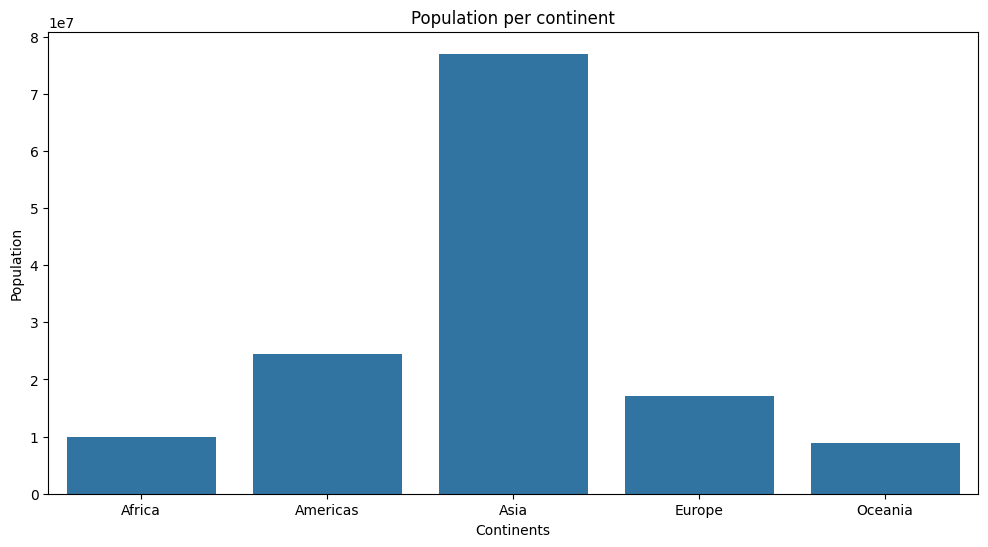

In [15]:
plt.figure(figsize=(12,6))
sns.barplot(data=continentdata_df,x='continent', y='population')
plt.xlabel("Continents")
plt.ylabel("Population")
plt.title("Population per continent")
plt.show()

Asia has the highest average population which is about 77 million, thirty-eight thousand, seven hundred twenty.

Continent to Life Expectancy analysis

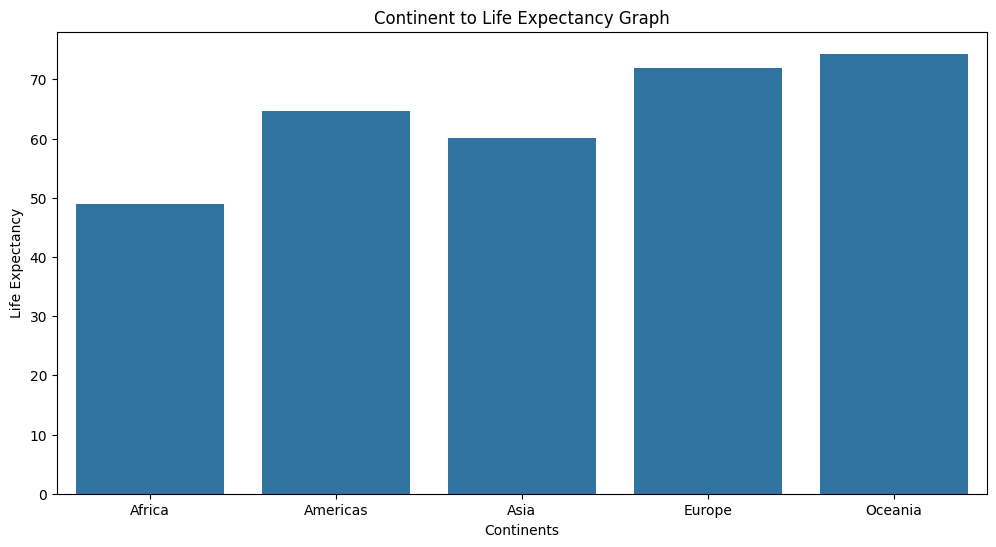

In [16]:
plt.figure(figsize=(12,6))
sns.barplot(data=continentdata_df,x='continent', y='life_exp')
plt.xlabel("Continents")
plt.ylabel("Life Expectancy")
plt.title("Continent to Life Expectancy Graph")
plt.show()

We can say that the Highest Average Life expectancy is in Oceania which is about 74.326208

Max GDP breakdown in each continent

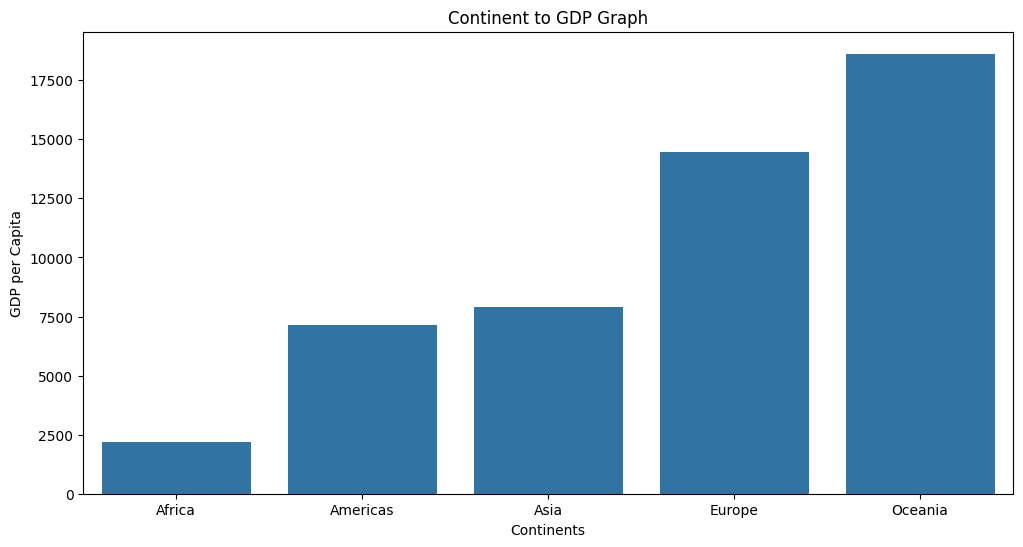

In [17]:
plt.figure(figsize=(12,6))
sns.barplot(data=continentdata_df,x='continent', y='gdp_cap')
plt.xlabel("Continents")
plt.ylabel("GDP per Capita")
plt.title("Continent to GDP Graph")
plt.show()

Highest Average GDP is in Oceania which is about 18621

2) Analysis done on each continent

Analysis on Asia

In [18]:
countryasia_df = data_df.loc[data_df['continent']=='Asia']
countryasia_df.head(5)

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106


In [19]:
countryasia_df['country'].unique()

array(['Afghanistan', 'Bahrain', 'Bangladesh', 'Cambodia', 'China',
       'Hong Kong, China', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel',
       'Japan', 'Jordan', 'Korea, Dem. Rep.', 'Korea, Rep.', 'Kuwait',
       'Lebanon', 'Malaysia', 'Mongolia', 'Myanmar', 'Nepal', 'Oman',
       'Pakistan', 'Philippines', 'Saudi Arabia', 'Singapore',
       'Sri Lanka', 'Syria', 'Taiwan', 'Thailand', 'Vietnam',
       'West Bank and Gaza', 'Yemen, Rep.'], dtype=object)

We have these many country in Asia

In [20]:
countryasiaa_df=countryasia_df.groupby('country')[['life_exp', 'gdp_cap', 'population']].aggregate({'life_exp': 'mean', 'gdp_cap': 'mean','population': 'mean' })
countryasiaa_df.head(5)

,life_exp,gdp_cap,population
country,,,
Afghanistan,37.478833,802.674598,1.582372e+07
Bahrain,65.605667,18077.663945,3.739132e+05
Bangladesh,49.834083,817.558818,9.075540e+07
Cambodia,47.902750,675.367824,8.510431e+06
China,61.785140,1488.307694,9.581601e+08


Top 10 Highest Populated country in Asia

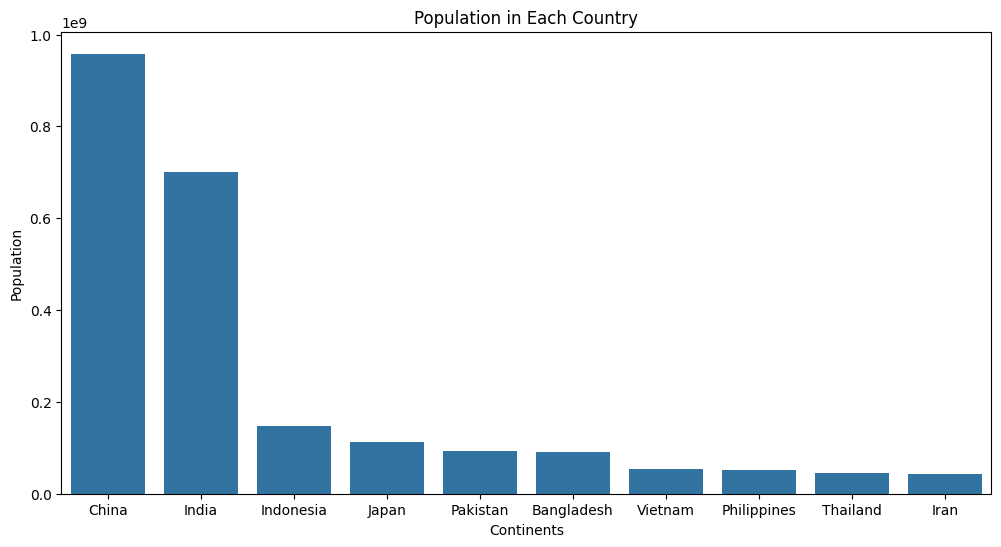

In [21]:
t10pofcasiaa_df = countryasiaa_df.sort_values(by='population', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(data=t10pofcasiaa_df,x='country', y='population')
plt.xlabel("Continents")
plt.ylabel("Population")
plt.title("Population in Each Country")
plt.show()

These are the countries with top population.

Highest Life Expectancy in Asia by country wise top 10

                   life_exp       gdp_cap    population
country                                                
Japan             74.826917  17750.869984  1.117588e+08
Israel            73.645833  14160.936434  3.845611e+06
Hong Kong, China  73.492833  16228.700865  4.792259e+06
Singapore         71.220250  17425.382267  2.667817e+06
Taiwan            70.336667  10224.807181  1.687472e+07
Kuwait            68.922333  65332.910472  1.206496e+06
Sri Lanka         66.526083   1854.731119  1.454583e+07
Lebanon           65.865667   7269.216241  2.781846e+06
Bahrain           65.605667  18077.663945  3.739132e+05
Korea, Rep.       65.001000   8217.318485  3.649939e+07


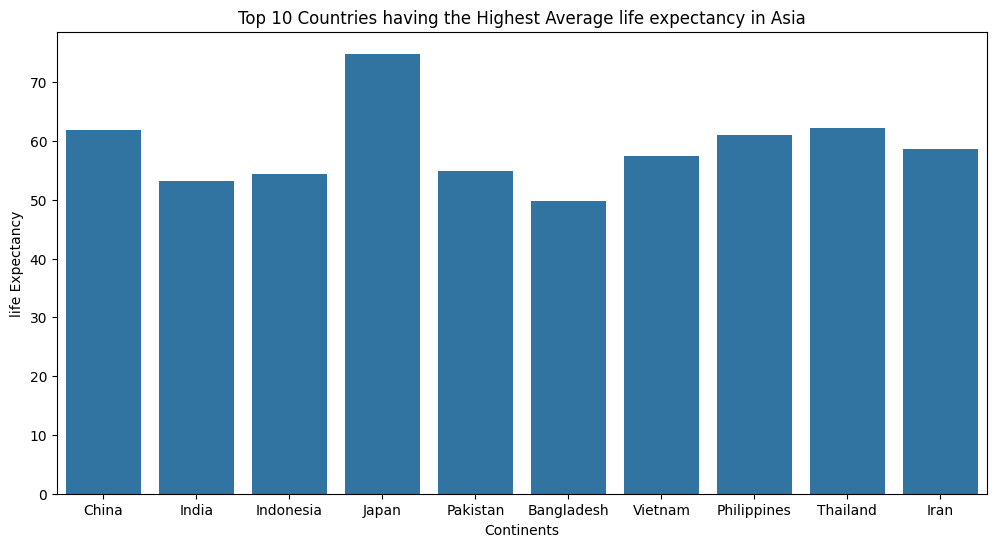

In [22]:
t10poflifeexpasia_df = countryasiaa_df.sort_values(by='life_exp', ascending=False).head(10)
print(t10poflifeexpasia_df)
plt.figure(figsize=(12,6))
sns.barplot(data=t10pofcasiaa_df,x='country', y='life_exp')
plt.xlabel("Continents")
plt.ylabel("life Expectancy")
plt.title("Top 10 Countries having the Highest Average life expectancy in Asia")
plt.show()

We can see that Japan has the highest life expectancy

Highest life expectancy according the top 10 countries with highest population

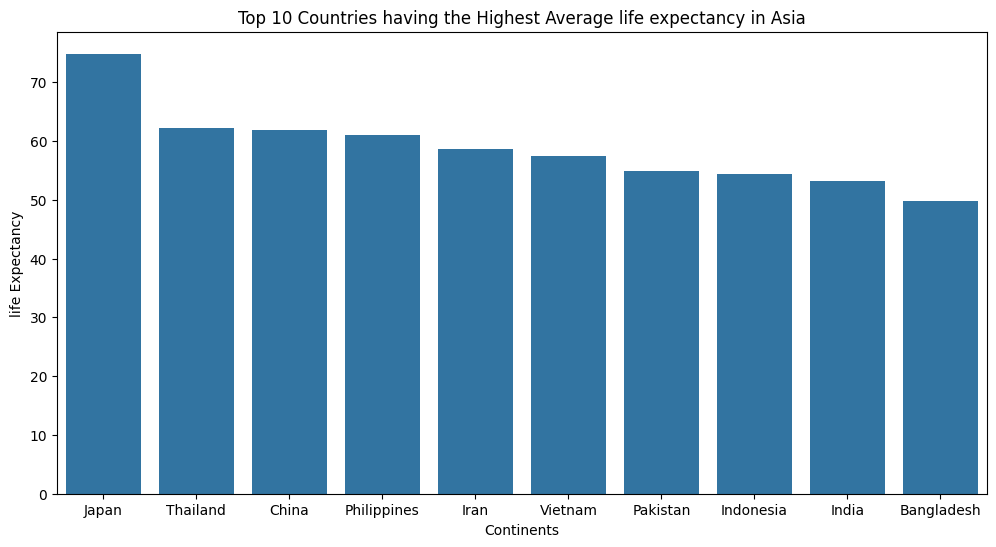

In [23]:
t10pofclifeexpasia_df = t10pofcasiaa_df.sort_values(by='life_exp', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(data=t10pofclifeexpasia_df,x='country', y='life_exp')
plt.xlabel("Continents")
plt.ylabel("life Expectancy")
plt.title("Top 10 Countries having the Highest Average life expectancy in Asia")
plt.show()

We can say that japan has the highest life expectancy even though the population is very less where as china stands at third position in terms of life expectancy eventhough
it has the highest no of population

Highest GDP in Asia by country wise top 10

                   life_exp       gdp_cap    population
country                                                
Kuwait            68.922333  65332.910472  1.206496e+06
Saudi Arabia      58.678750  20261.743635  1.247837e+07
Bahrain           65.605667  18077.663945  3.739132e+05
Japan             74.826917  17750.869984  1.117588e+08
Singapore         71.220250  17425.382267  2.667817e+06
Hong Kong, China  73.492833  16228.700865  4.792259e+06
Israel            73.645833  14160.936434  3.845611e+06
Oman              58.442667  12138.562227  1.438205e+06
Taiwan            70.336667  10224.807181  1.687472e+07
Korea, Rep.       65.001000   8217.318485  3.649939e+07


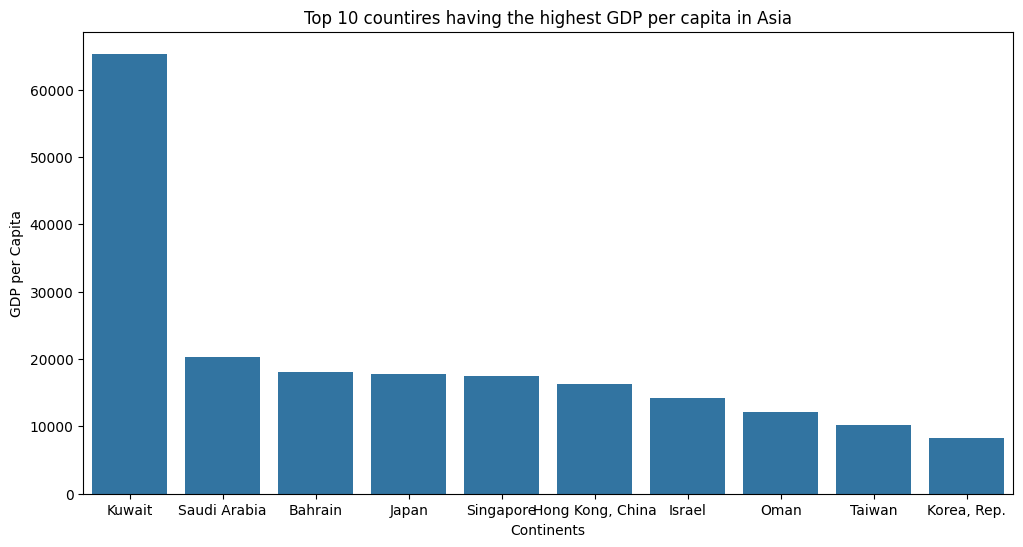

In [24]:
t10pofgdpofasia_df = countryasiaa_df.sort_values(by='gdp_cap', ascending=False).head(10)
print(t10pofgdpofasia_df)
plt.figure(figsize=(12,6))
sns.barplot(data=t10pofgdpofasia_df,x='country', y='gdp_cap')
plt.xlabel("Continents")
plt.ylabel("GDP per Capita")
plt.title("Top 10 countires having the highest GDP per capita in Asia")
plt.show()

Kuwait has the highest GDP which is about 113523

Highest Average GDP according the top 10 countries with highest population

              life_exp       gdp_cap    population
country                                           
Japan        74.826917  17750.869984  1.117588e+08
Iran         58.636583   7376.582905  4.230171e+07
Thailand     62.200250   3045.966474  4.496163e+07
Philippines  60.967250   2174.771130  5.263663e+07
Indonesia    54.335750   1741.365360  1.483228e+08
China        61.785140   1488.307694  9.581601e+08
Pakistan     54.882250   1439.270689  9.368339e+07
India        53.166083   1057.296307  7.011307e+08
Vietnam      57.479500   1017.712615  5.456857e+07
Bangladesh   49.834083    817.558818  9.075540e+07


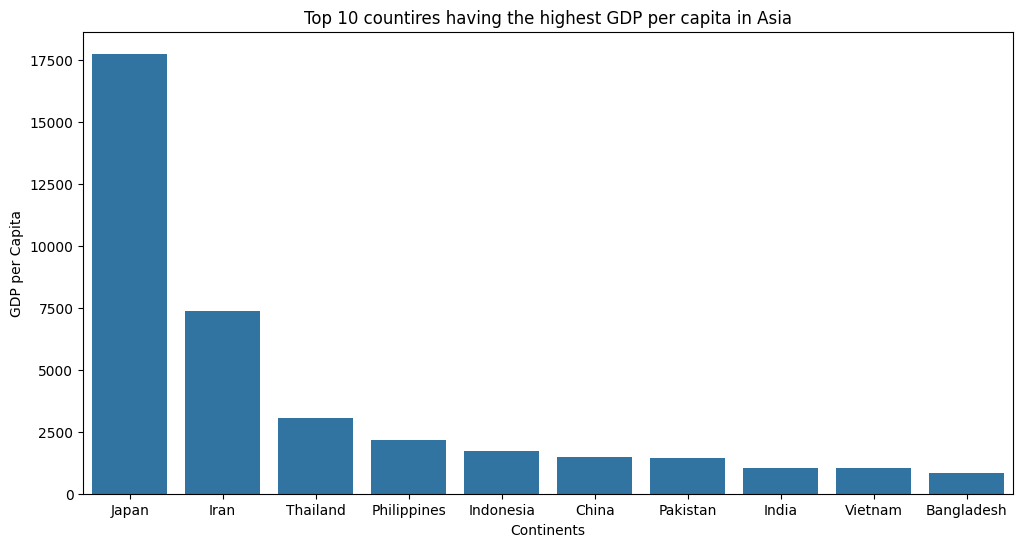

In [25]:
t10pofcgdpofasia_df = t10pofcasiaa_df.sort_values(by='gdp_cap', ascending=False).head(10)
print(t10pofcgdpofasia_df)
plt.figure(figsize=(12,6))
sns.barplot(data=t10pofcgdpofasia_df,x='country', y='gdp_cap')
plt.xlabel("Continents")
plt.ylabel("GDP per Capita")
plt.title("Top 10 countires having the highest GDP per capita in Asia")
plt.show()

In the countries with highest population we can see that japan has the highest GDP that is about 31656

Analysis on America

In [26]:
countryamerica_df = data_df.loc[data_df['continent']=='Americas']
countryamerica_df.head(5)

,country,year,population,continent,life_exp,gdp_cap
48,Argentina,1952,17876956,Americas,62.485,5911.315053
49,Argentina,1957,19610538,Americas,64.399,6856.856212
50,Argentina,1962,21283783,Americas,65.142,7133.166023
51,Argentina,1967,22934225,Americas,65.634,8052.953021
52,Argentina,1972,24779799,Americas,67.065,9443.038526


In [27]:
countryamerica_df['country'].unique()

array(['Argentina', 'Bolivia', 'Brazil', 'Canada', 'Chile', 'Colombia',
       'Costa Rica', 'Cuba', 'Dominican Republic', 'Ecuador',
       'El Salvador', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica',
       'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Puerto Rico',
       'Trinidad and Tobago', 'United States', 'Uruguay', 'Venezuela'],
      dtype=object)

we have these many countries in America

In [28]:
countryamericaa_df=countryamerica_df.groupby('country')[['life_exp', 'gdp_cap', 'population']].aggregate({'life_exp': 'mean', 'gdp_cap': 'mean','population': 'mean' })
countryamericaa_df.head(5)

,life_exp,gdp_cap,population
country,,,
Argentina,69.060417,8955.553783,2.860224e+07
Bolivia,52.504583,2961.228754,5.610395e+06
Brazil,62.239500,5829.316653,1.223121e+08
Canada,74.902750,22410.746340,2.446297e+07
Chile,67.430917,6703.289147,1.120573e+07


Top 10 Highest Populated country in America

                life_exp       gdp_cap    population
country                                             
United States  73.478500  26261.151347  2.282112e+08
Brazil         62.239500   5829.316653  1.223121e+08
Mexico         65.408833   7724.112675  6.841430e+07
Argentina      69.060417   8955.553783  2.860224e+07
Colombia       63.897750   4195.342920  2.725610e+07
Canada         74.902750  22410.746340  2.446297e+07
Peru           58.859333   5613.844087  1.755909e+07
Venezuela      66.580667  10088.516252  1.512980e+07
Chile          67.430917   6703.289147  1.120573e+07
Cuba           71.045083   6283.258678  9.232576e+06


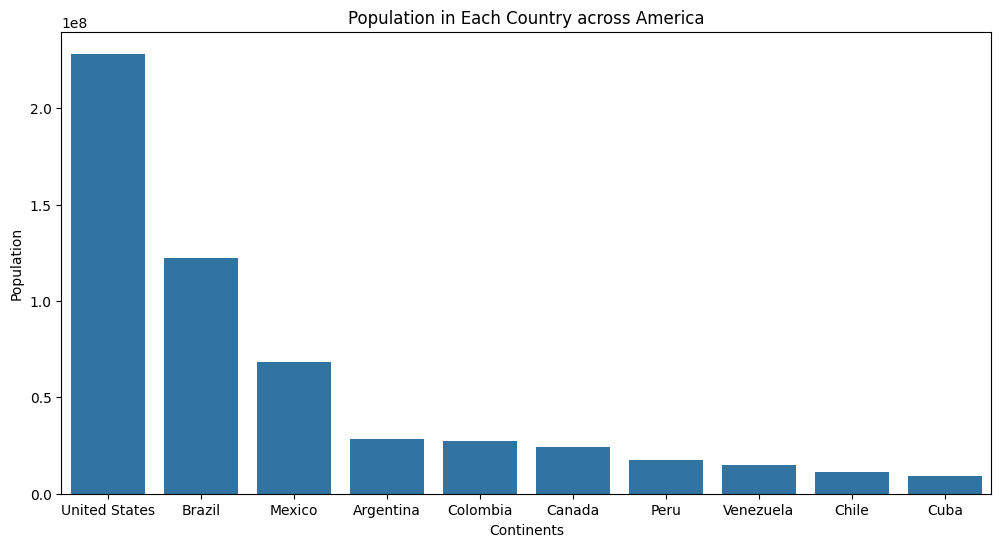

In [29]:
t10pofcamerica_df = countryamericaa_df.sort_values(by='population', ascending=False).head(10)
print(t10pofcamerica_df)
plt.figure(figsize=(12,6))
sns.barplot(data=t10pofcamerica_df,x='country', y='population')
plt.xlabel("Continents")
plt.ylabel("Population")
plt.title("Population in Each Country across America")
plt.show()

United states has the highest population which is about 228 million, two hundred eleven thousand, two hundred.

Highest Average life expectancy in America Top 10

                life_exp       gdp_cap    population
country                                             
Canada         74.902750  22410.746340  2.446297e+07
United States  73.478500  26261.151347  2.282112e+08
Puerto Rico    72.739333  10863.164303  3.115178e+06
Cuba           71.045083   6283.258678  9.232576e+06
Uruguay        70.781583   7100.133176  2.912487e+06
Costa Rica     70.181417   5448.610779  2.400008e+06
Argentina      69.060417   8955.553783  2.860224e+07
Jamaica        68.749333   6197.645405  2.135123e+06
Panama         67.801750   5754.827172  1.985290e+06
Chile          67.430917   6703.289147  1.120573e+07


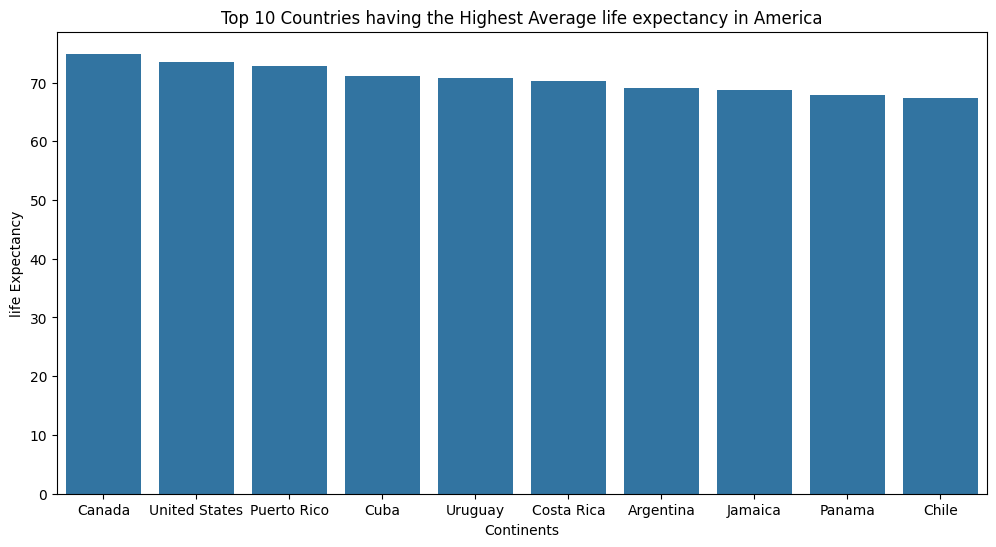

In [30]:
t10poflifeexpamerica_df = countryamericaa_df.sort_values(by='life_exp', ascending=False).head(10)
print(t10poflifeexpamerica_df)
plt.figure(figsize=(12,6))
sns.barplot(data=t10poflifeexpamerica_df,x='country', y='life_exp')
plt.xlabel("Continents")
plt.ylabel("life Expectancy")
plt.title("Top 10 Countries having the Highest Average life expectancy in America")
plt.show()

We can see that canada has the highest life expectancy which is about 74.90

Highest Average life expectancy in Top 10 Highest populated country in America

                life_exp       gdp_cap    population
country                                             
Canada         74.902750  22410.746340  2.446297e+07
United States  73.478500  26261.151347  2.282112e+08
Cuba           71.045083   6283.258678  9.232576e+06
Argentina      69.060417   8955.553783  2.860224e+07
Chile          67.430917   6703.289147  1.120573e+07
Venezuela      66.580667  10088.516252  1.512980e+07
Mexico         65.408833   7724.112675  6.841430e+07
Colombia       63.897750   4195.342920  2.725610e+07
Brazil         62.239500   5829.316653  1.223121e+08
Peru           58.859333   5613.844087  1.755909e+07


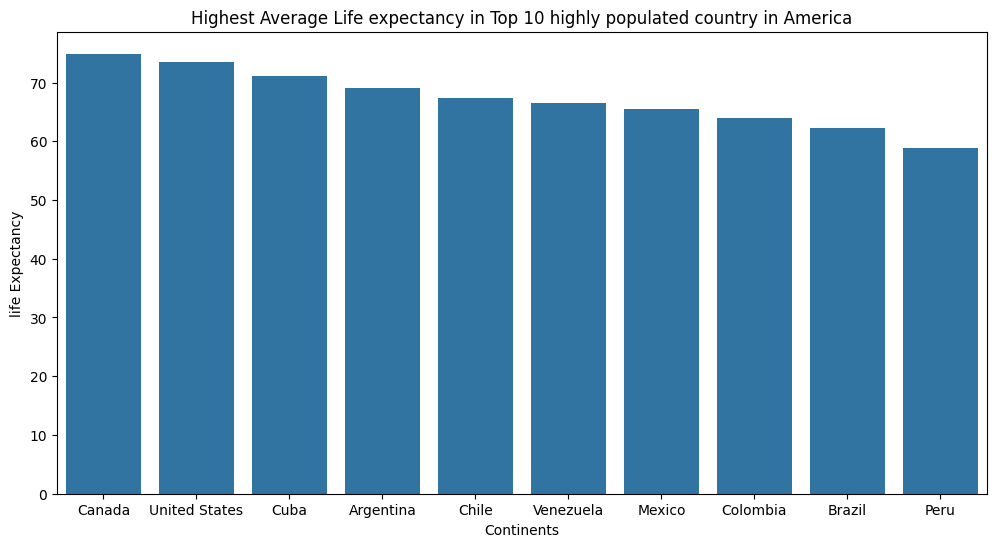

In [31]:
t10poflifeexpamerica_df = t10pofcamerica_df.sort_values(by='life_exp', ascending=False).head(10)
print(t10poflifeexpamerica_df)
plt.figure(figsize=(12,6))
sns.barplot(data=t10poflifeexpamerica_df,x='country', y='life_exp')
plt.xlabel("Continents")
plt.ylabel("life Expectancy")
plt.title("Highest Average Life expectancy in Top 10 highly populated country in America")
plt.show()

Highest GDP in America Top 10

                      life_exp       gdp_cap    population
country                                                   
United States        73.478500  26261.151347  2.282112e+08
Canada               74.902750  22410.746340  2.446297e+07
Puerto Rico          72.739333  10863.164303  3.115178e+06
Venezuela            66.580667  10088.516252  1.512980e+07
Argentina            69.060417   8955.553783  2.860224e+07
Trinidad and Tobago  66.828000   7866.871946  1.006470e+06
Mexico               65.408833   7724.112675  6.841430e+07
Uruguay              70.781583   7100.133176  2.912487e+06
Chile                67.430917   6703.289147  1.120573e+07
Cuba                 71.045083   6283.258678  9.232576e+06


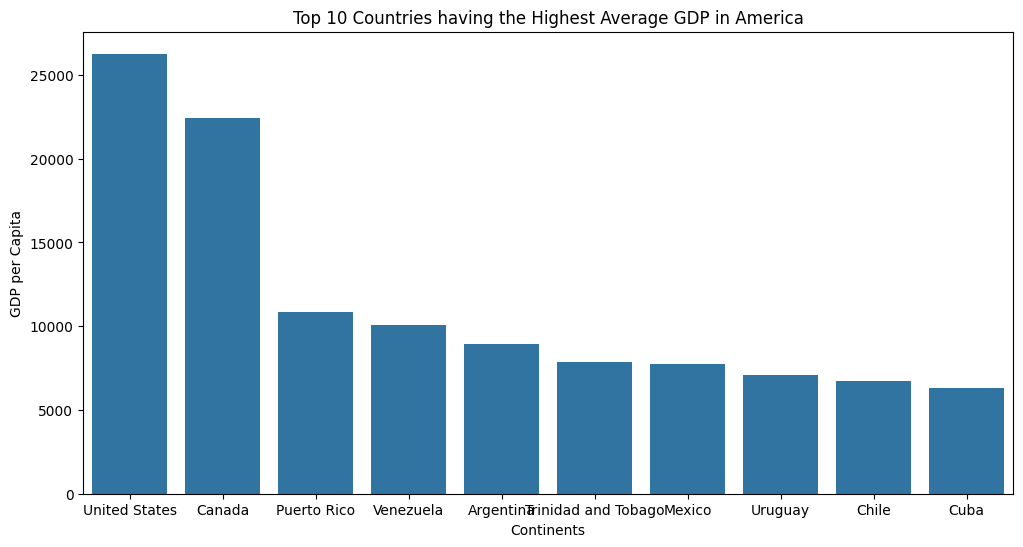

In [32]:
t10pofgdpamerica_df = countryamericaa_df.sort_values(by='gdp_cap', ascending=False).head(10)
print(t10pofgdpamerica_df)
plt.figure(figsize=(12,6))
sns.barplot(data=t10pofgdpamerica_df,x='country', y='gdp_cap')
plt.xlabel("Continents")
plt.ylabel("GDP per Capita")
plt.title("Top 10 Countries having the Highest Average GDP in America")
plt.show()

United States has the highest average GDP per capita that is 26261.1

Highest Average GDP in Highly populated Country in America

                life_exp       gdp_cap    population
country                                             
United States  73.478500  26261.151347  2.282112e+08
Canada         74.902750  22410.746340  2.446297e+07
Venezuela      66.580667  10088.516252  1.512980e+07
Argentina      69.060417   8955.553783  2.860224e+07
Mexico         65.408833   7724.112675  6.841430e+07
Chile          67.430917   6703.289147  1.120573e+07
Cuba           71.045083   6283.258678  9.232576e+06
Brazil         62.239500   5829.316653  1.223121e+08
Peru           58.859333   5613.844087  1.755909e+07
Colombia       63.897750   4195.342920  2.725610e+07


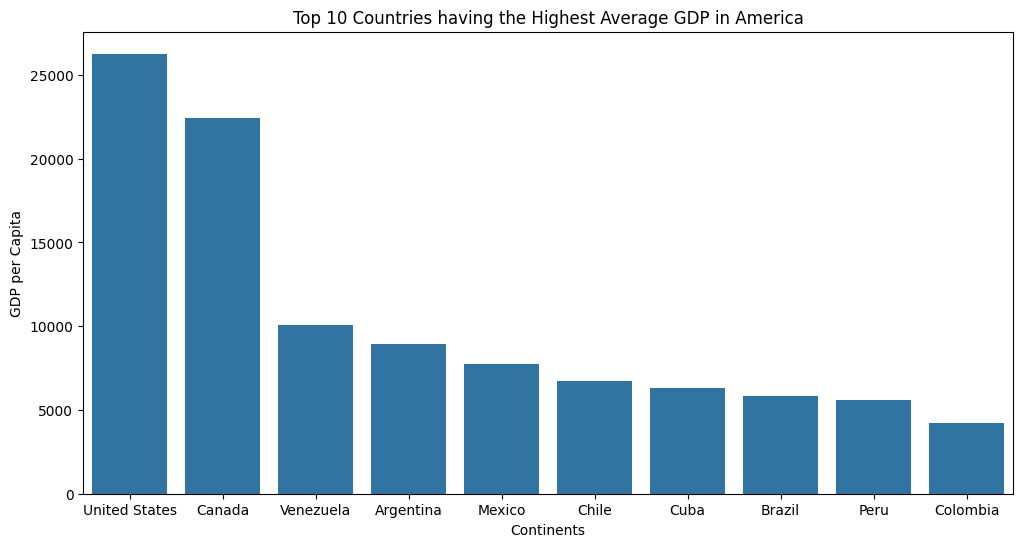

In [33]:
t10pofcgdpamerica_df = t10pofcamerica_df.sort_values(by='gdp_cap', ascending=False).head(10)
print(t10pofcgdpamerica_df)
plt.figure(figsize=(12,6))
sns.barplot(data=t10pofcgdpamerica_df,x='country', y='gdp_cap')
plt.xlabel("Continents")
plt.ylabel("GDP per Capita")
plt.title("Top 10 Countries having the Highest Average GDP in America")
plt.show()

Analysis on Europe

In [34]:
countryeurope_df = data_df.loc[data_df['continent']=='Europe']
countryeurope_df.head(5)

,country,year,population,continent,life_exp,gdp_cap
12,Albania,1952,1282697,Europe,55.23,1601.056136
13,Albania,1957,1476505,Europe,59.28,1942.284244
14,Albania,1962,1728137,Europe,64.82,2312.888958
15,Albania,1967,1984060,Europe,66.22,2760.196931
16,Albania,1972,2263554,Europe,67.69,3313.422188


In [35]:
countryeurope_df['country'].unique()

array(['Albania', 'Austria', 'Belgium', 'Bosnia and Herzegovina',
       'Bulgaria', 'Croatia', 'Czech Republic', 'Denmark', 'Finland',
       'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland',
       'Italy', 'Montenegro', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'Romania', 'Serbia', 'Slovak Republic', 'Slovenia',
       'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom'],
      dtype=object)

We have these many countries in Europe

In [36]:
countryeuropee_df=countryeurope_df.groupby('country')[['life_exp', 'gdp_cap', 'population']].aggregate({'life_exp': 'mean', 'gdp_cap': 'mean','population': 'mean' })
countryeuropee_df.head(5)

,life_exp,gdp_cap,population
country,,,
Albania,68.432917,3255.366633,2.580249e+06
Austria,73.103250,20411.916279,7.583298e+06
Belgium,73.641750,19900.758072,9.725119e+06
Bosnia and Herzegovina,67.707833,3484.779069,3.816525e+06
Bulgaria,69.743750,6384.055172,8.182985e+06


Top 10 Highly Populated country in Europe

                 life_exp       gdp_cap    population
country                                              
Germany         73.444417  20556.684433  7.754704e+07
United Kingdom  73.922583  19380.472986  5.608780e+07
Italy           74.013833  16245.209006  5.453696e+07
France          74.348917  18833.570327  5.295256e+07
Turkey          59.696417   4469.453380  4.590901e+07
Spain           74.203417  14029.826479  3.585180e+07
Poland          70.176917   8416.553912  3.432330e+07
Romania         68.290667   7300.169974  2.081909e+07
Netherlands     75.648500  21748.852208  1.378680e+07
Hungary         69.393167  10888.175654  1.021765e+07


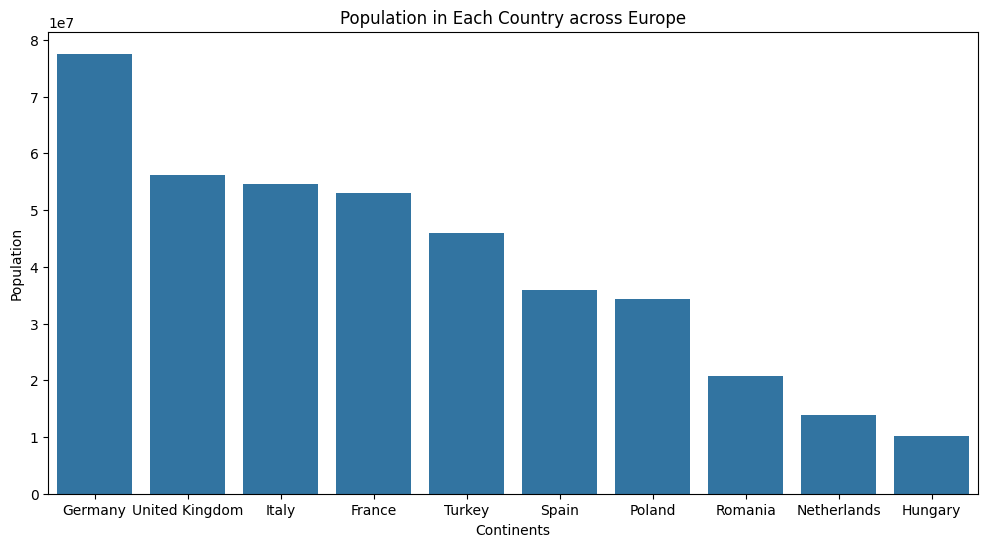

In [37]:
t10pofceurope_df = countryeuropee_df.sort_values(by='population', ascending=False).head(10)
print(t10pofceurope_df)
plt.figure(figsize=(12,6))
sns.barplot(data=t10pofceurope_df,x='country', y='population')
plt.xlabel("Continents")
plt.ylabel("Population")
plt.title("Population in Each Country across Europe")
plt.show()

We can Say that Germany is the most highly populated Country in Europe

Highest Average Life Expectancy in Europe

                 life_exp       gdp_cap    population
country                                              
Iceland         76.511417  20531.422272  2.269781e+05
Sweden          76.177000  19943.126104  8.220029e+06
Norway          75.843000  26747.306554  4.031441e+06
Netherlands     75.648500  21748.852208  1.378680e+07
Switzerland     75.565083  27074.334405  6.384293e+06
Denmark         74.370167  21671.824888  4.994187e+06
France          74.348917  18833.570327  5.295256e+07
Spain           74.203417  14029.826479  3.585180e+07
Italy           74.013833  16245.209006  5.453696e+07
United Kingdom  73.922583  19380.472986  5.608780e+07


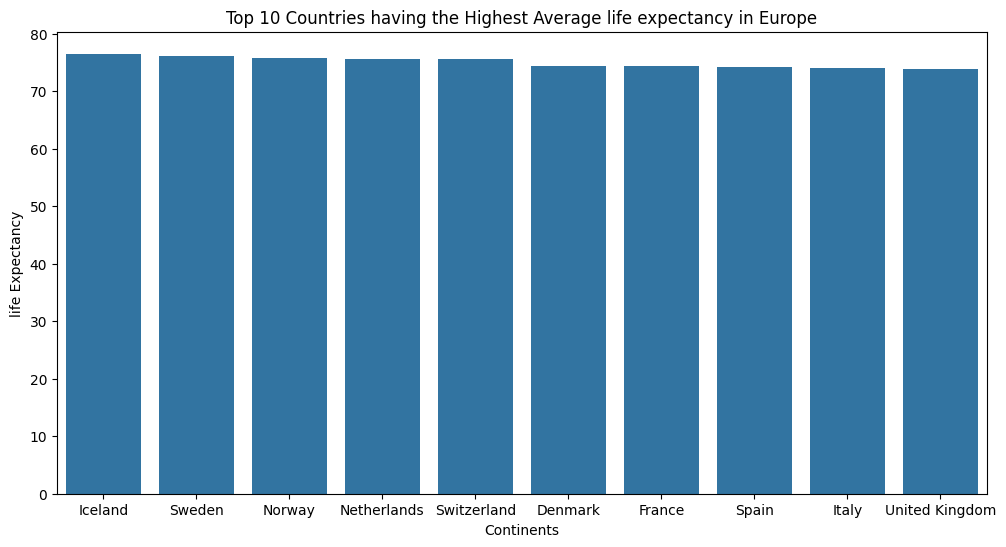

In [38]:
t10poflifeexpeurope_df = countryeuropee_df.sort_values(by='life_exp', ascending=False).head(10)
print(t10poflifeexpeurope_df)
plt.figure(figsize=(12,6))
sns.barplot(data=t10poflifeexpeurope_df,x='country', y='life_exp')
plt.xlabel("Continents")
plt.ylabel("life Expectancy")
plt.title("Top 10 Countries having the Highest Average life expectancy in Europe")
plt.show()

Iceland has the highest average life expectancy of about 76.511417

Average life Expectancy of highly populated countries in Europe

                 life_exp       gdp_cap    population
country                                              
Netherlands     75.648500  21748.852208  1.378680e+07
France          74.348917  18833.570327  5.295256e+07
Spain           74.203417  14029.826479  3.585180e+07
Italy           74.013833  16245.209006  5.453696e+07
United Kingdom  73.922583  19380.472986  5.608780e+07
Germany         73.444417  20556.684433  7.754704e+07
Poland          70.176917   8416.553912  3.432330e+07
Hungary         69.393167  10888.175654  1.021765e+07
Romania         68.290667   7300.169974  2.081909e+07
Turkey          59.696417   4469.453380  4.590901e+07


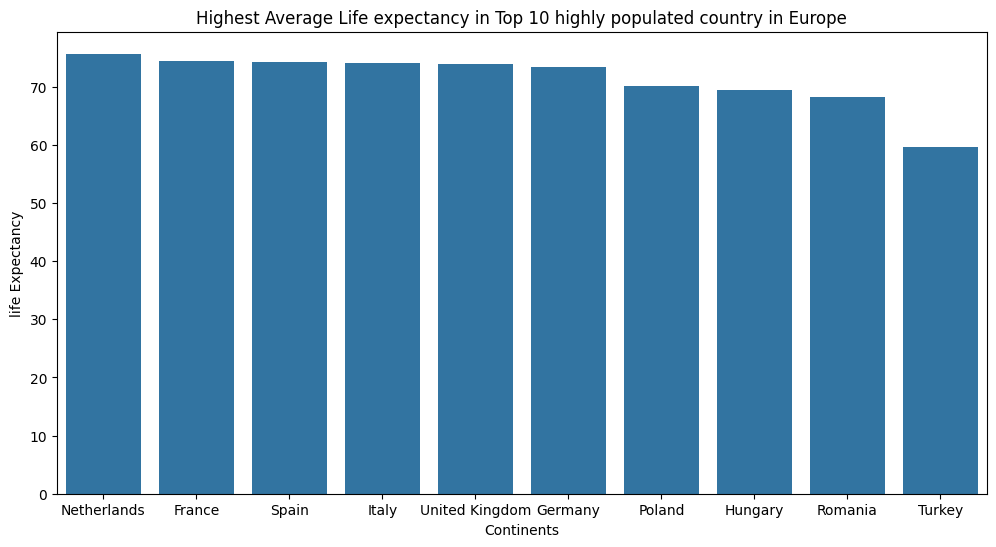

In [39]:
t10poflifeexpeurope_df = t10pofceurope_df.sort_values(by='life_exp', ascending=False).head(10)
print(t10poflifeexpeurope_df)
plt.figure(figsize=(12,6))
sns.barplot(data=t10poflifeexpeurope_df,x='country', y='life_exp')
plt.xlabel("Continents")
plt.ylabel("life Expectancy")
plt.title("Highest Average Life expectancy in Top 10 highly populated country in Europe")
plt.show()

Among the highest populated country netherland has the highest average life expectancy that is about 75.6

Top 10 Highest GDP in Europe

                 life_exp       gdp_cap    population
country                                              
Switzerland     75.565083  27074.334405  6.384293e+06
Norway          75.843000  26747.306554  4.031441e+06
Netherlands     75.648500  21748.852208  1.378680e+07
Denmark         74.370167  21671.824888  4.994187e+06
Germany         73.444417  20556.684433  7.754704e+07
Iceland         76.511417  20531.422272  2.269781e+05
Austria         73.103250  20411.916279  7.583298e+06
Sweden          76.177000  19943.126104  8.220029e+06
Belgium         73.641750  19900.758072  9.725119e+06
United Kingdom  73.922583  19380.472986  5.608780e+07


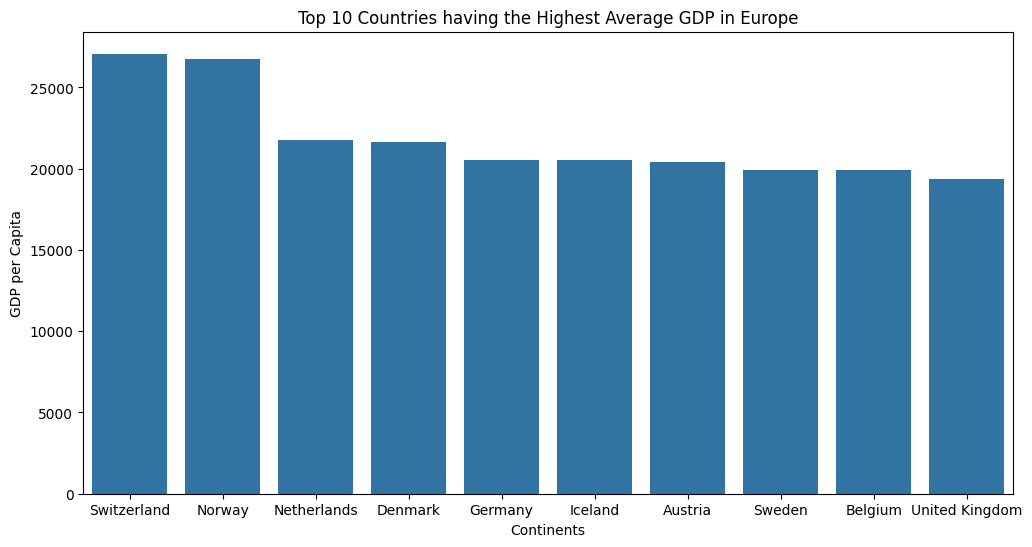

In [40]:
t10pofgdpeurope_df = countryeuropee_df.sort_values(by='gdp_cap', ascending=False).head(10)
print(t10pofgdpeurope_df)
plt.figure(figsize=(12,6))
sns.barplot(data=t10pofgdpeurope_df,x='country', y='gdp_cap')
plt.xlabel("Continents")
plt.ylabel("GDP per Capita")
plt.title("Top 10 Countries having the Highest Average GDP in Europe")
plt.show()

We can see that Switzerland has the highest average GDP per capita of about 27074.334405  

Highest GDP in highly populated countries of Europe

                 life_exp       gdp_cap    population
country                                              
Netherlands     75.648500  21748.852208  1.378680e+07
Germany         73.444417  20556.684433  7.754704e+07
United Kingdom  73.922583  19380.472986  5.608780e+07
France          74.348917  18833.570327  5.295256e+07
Italy           74.013833  16245.209006  5.453696e+07
Spain           74.203417  14029.826479  3.585180e+07
Hungary         69.393167  10888.175654  1.021765e+07
Poland          70.176917   8416.553912  3.432330e+07
Romania         68.290667   7300.169974  2.081909e+07
Turkey          59.696417   4469.453380  4.590901e+07


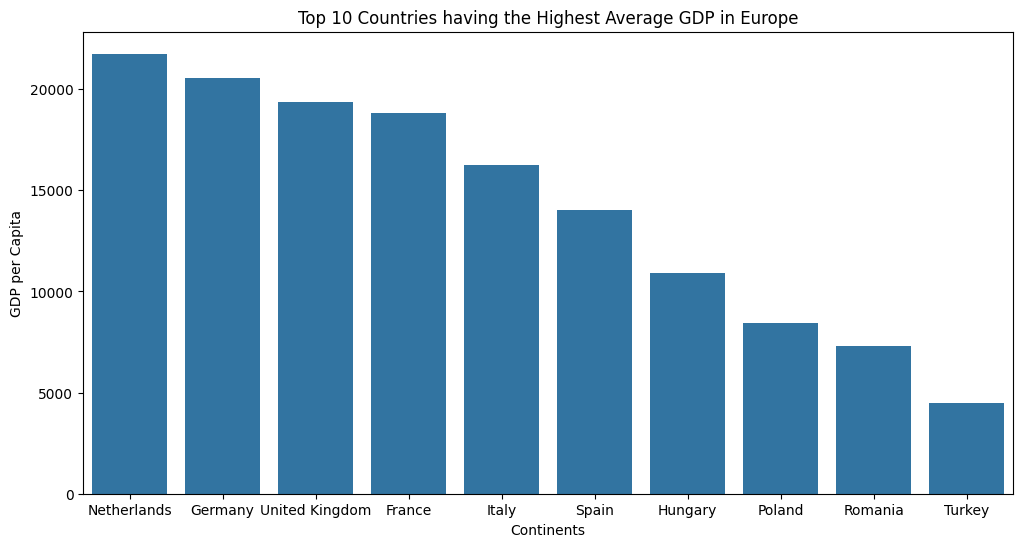

In [41]:
t10pofcgdpeurope_df = t10pofceurope_df.sort_values(by='gdp_cap', ascending=False).head(10)
print(t10pofcgdpeurope_df)
plt.figure(figsize=(12,6))
sns.barplot(data=t10pofcgdpeurope_df,x='country', y='gdp_cap')
plt.xlabel("Continents")
plt.ylabel("GDP per Capita")
plt.title("Top 10 Countries having the Highest Average GDP in Europe")
plt.show()

We can see among the highest populated areas Netherland has the highest GDP which is about 21748

Analysis on Africa

In [42]:
countryafrica_df = data_df.loc[data_df['continent']=='Africa']
countryafrica_df.head(5)

,country,year,population,continent,life_exp,gdp_cap
24,Algeria,1952,9279525,Africa,43.077,2449.008185
25,Algeria,1957,10270856,Africa,45.685,3013.976023
26,Algeria,1962,11000948,Africa,48.303,2550.816880
27,Algeria,1967,12760499,Africa,51.407,3246.991771
28,Algeria,1972,14760787,Africa,54.518,4182.663766


In [43]:
countryafrica_df['country'].unique()

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya',
       'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia',
       'Niger', 'Nigeria', 'Reunion', 'Rwanda', 'Sao Tome and Principe',
       'Senegal', 'Sierra Leone', 'Somalia', 'South Africa', 'Sudan',
       'Swaziland', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia',
       'Zimbabwe'], dtype=object)

These are the countries in Africa

In [44]:
countryafricaa_df=countryafrica_df.groupby('country')[['life_exp', 'gdp_cap', 'population']].aggregate({'life_exp': 'mean', 'gdp_cap': 'mean','population': 'mean' })
countryafricaa_df.head(5)

,life_exp,gdp_cap,population
country,,,
Algeria,59.030167,4426.025973,1.987541e+07
Angola,37.883500,3607.100529,7.309390e+06
Benin,48.779917,1155.395107,4.017497e+06
Botswana,54.597500,5031.503557,9.711862e+05
Burkina Faso,44.694000,843.990665,7.548677e+06


Top 10 highly populated country in Africa

                   life_exp      gdp_cap    population
country                                               
Nigeria           43.581333  1488.309429  7.370802e+07
Egypt             56.243000  3074.030731  4.652277e+07
Ethiopia          44.475750   509.115155  4.163252e+07
Congo, Dem. Rep.  44.543750   648.342646  3.268166e+07
South Africa      53.993167  7247.431074  2.992835e+07
Sudan             48.400500  1835.010430  2.156033e+07
Morocco           57.608833  2447.908864  2.055574e+07
Tanzania          47.912333   849.281271  2.049950e+07
Algeria           59.030167  4426.025973  1.987541e+07
Kenya             52.681000  1200.415720  1.820625e+07


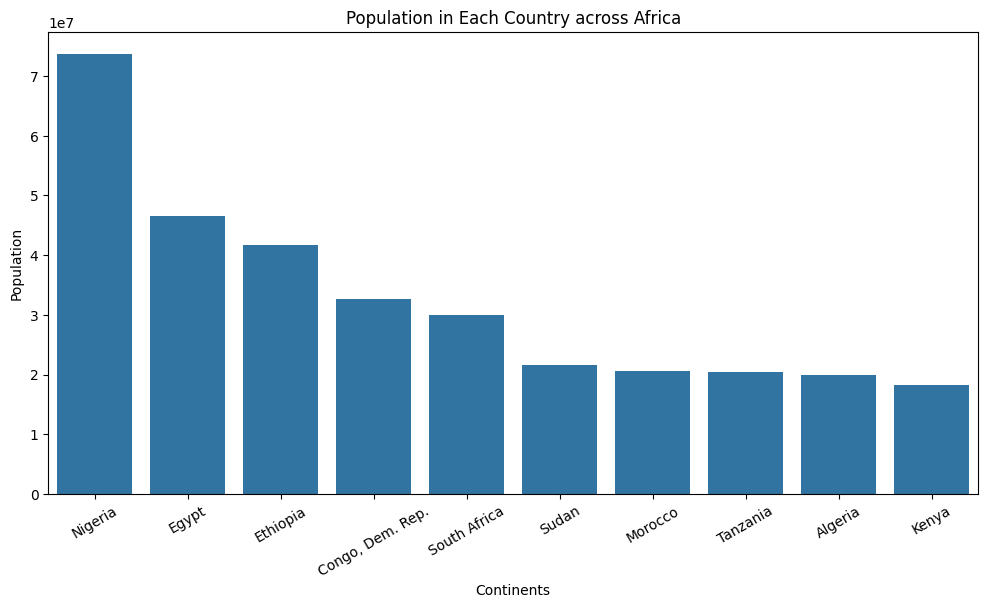

In [45]:
t10pofcafrica_df = countryafricaa_df.sort_values(by='population', ascending=False).head(10)
print(t10pofcafrica_df)
plt.figure(figsize=(12,6))
sns.barplot(data=t10pofcafrica_df,x='country', y='population')
plt.xlabel("Continents")
plt.ylabel("Population")
plt.xticks(rotation=30)
plt.title("Population in Each Country across Africa")
plt.show()

We can see that Nigeria has the highest average population about Seventy-three million, seven hundred eight thousand, twenty.

Highest Average Life expectancy

                        life_exp       gdp_cap    population
country                                                     
Reunion                66.644250   4898.398390  5.184978e+05
Mauritius              64.953250   4768.942221  9.260722e+05
Tunisia                60.721000   3477.210351  6.686770e+06
Libya                  59.304167  12013.579201  3.166804e+06
Algeria                59.030167   4426.025973  1.987541e+07
Sao Tome and Principe  57.896333   1382.782001  1.059778e+05
Morocco                57.608833   2447.908864  2.055574e+07
Egypt                  56.243000   3074.030731  4.652277e+07
Botswana               54.597500   5031.503557  9.711862e+05
South Africa           53.993167   7247.431074  2.992835e+07


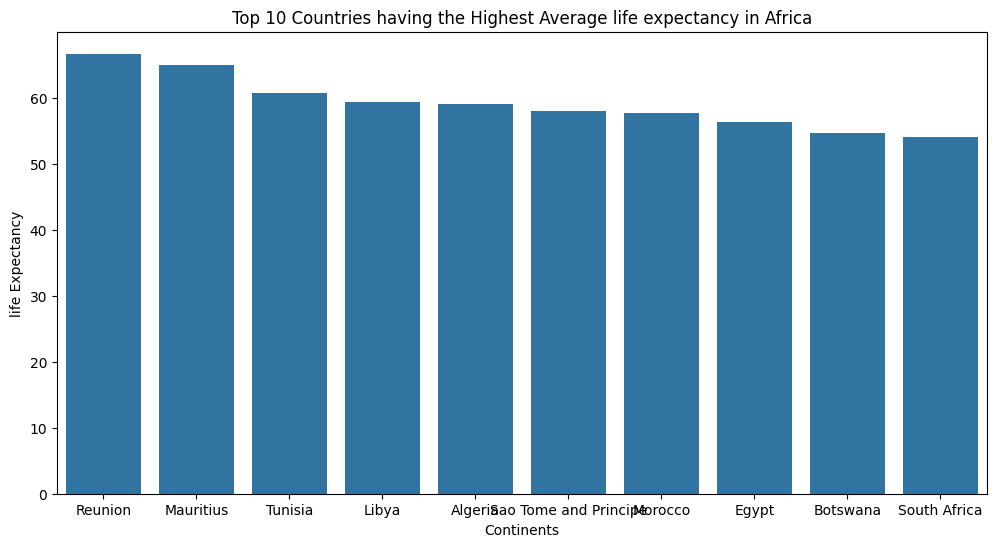

In [46]:
t10poflifeexpafrica_df = countryafricaa_df.sort_values(by='life_exp', ascending=False).head(10)
print(t10poflifeexpafrica_df)
plt.figure(figsize=(12,6))
sns.barplot(data=t10poflifeexpafrica_df,x='country', y='life_exp')
plt.xlabel("Continents")
plt.ylabel("life Expectancy")
plt.title("Top 10 Countries having the Highest Average life expectancy in Africa")
plt.show()

Highest life expectancy is in the Reunion country of africa which is about 66.644250

Average life expectancy of highly Populated country in Africa

                   life_exp      gdp_cap    population
country                                               
Algeria           59.030167  4426.025973  1.987541e+07
Morocco           57.608833  2447.908864  2.055574e+07
Egypt             56.243000  3074.030731  4.652277e+07
South Africa      53.993167  7247.431074  2.992835e+07
Kenya             52.681000  1200.415720  1.820625e+07
Sudan             48.400500  1835.010430  2.156033e+07
Tanzania          47.912333   849.281271  2.049950e+07
Congo, Dem. Rep.  44.543750   648.342646  3.268166e+07
Ethiopia          44.475750   509.115155  4.163252e+07
Nigeria           43.581333  1488.309429  7.370802e+07


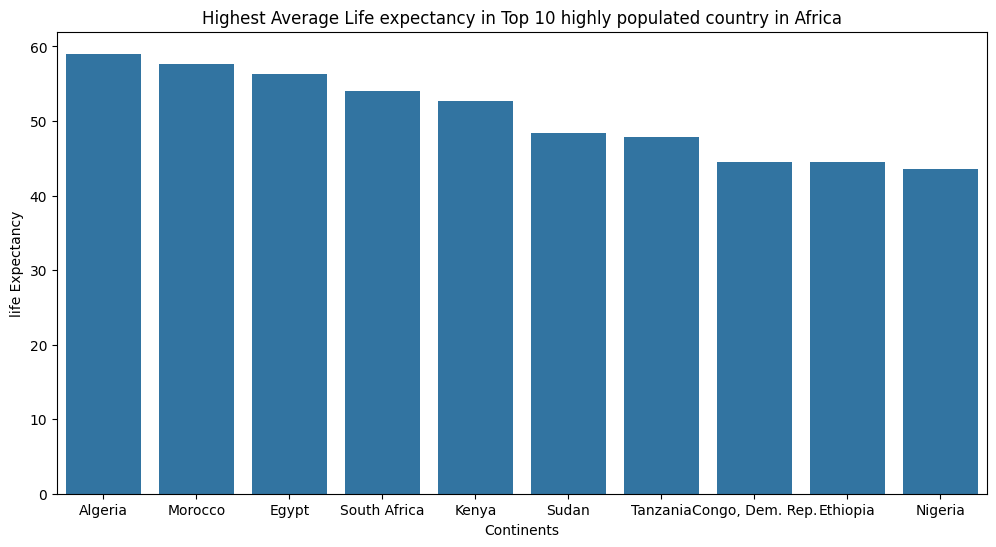

In [47]:
t10poflifeexpafrica_df = t10pofcafrica_df.sort_values(by='life_exp', ascending=False).head(10)
print(t10poflifeexpafrica_df)
plt.figure(figsize=(12,6))
sns.barplot(data=t10poflifeexpafrica_df,x='country', y='life_exp')
plt.xlabel("Continents")
plt.ylabel("life Expectancy")
plt.title("Highest Average Life expectancy in Top 10 highly populated country in Africa")
plt.show()

Amongst the top highly populated countries in Africa we can say that Algeria is the one which has the highest Life Expectancy

Top 10 Highest GDP in Africa

               life_exp       gdp_cap    population
country                                            
Libya         59.304167  12013.579201  3.166804e+06
Gabon         51.220500  11529.865474  7.954154e+05
South Africa  53.993167   7247.431074  2.992835e+07
Botswana      54.597500   5031.503557  9.711862e+05
Reunion       66.644250   4898.398390  5.184978e+05
Mauritius     64.953250   4768.942221  9.260722e+05
Algeria       59.030167   4426.025973  1.987541e+07
Namibia       53.491333   3675.582087  1.157850e+06
Angola        37.883500   3607.100529  7.309390e+06
Tunisia       60.721000   3477.210351  6.686770e+06


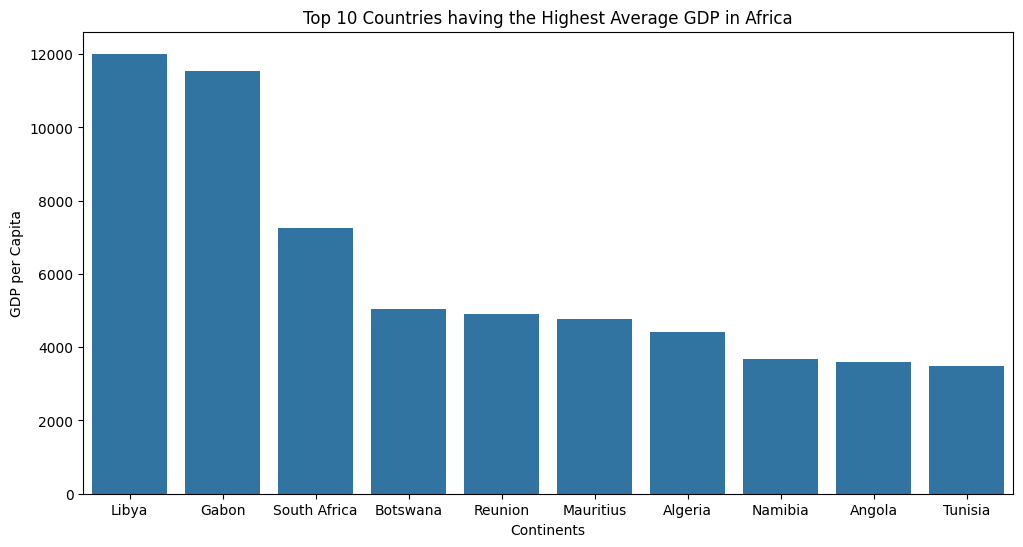

In [48]:
t10pofgdpafrica_df = countryafricaa_df.sort_values(by='gdp_cap', ascending=False).head(10)
print(t10pofgdpafrica_df)
plt.figure(figsize=(12,6))
sns.barplot(data=t10pofgdpafrica_df,x='country', y='gdp_cap')
plt.xlabel("Continents")
plt.ylabel("GDP per Capita")
plt.title("Top 10 Countries having the Highest Average GDP in Africa")
plt.show()

Libya has the highest GDP in Africa which is about 12013

Highest Average GDP in highly populated countries of Africa

                   life_exp      gdp_cap    population
country                                               
South Africa      53.993167  7247.431074  2.992835e+07
Algeria           59.030167  4426.025973  1.987541e+07
Egypt             56.243000  3074.030731  4.652277e+07
Morocco           57.608833  2447.908864  2.055574e+07
Sudan             48.400500  1835.010430  2.156033e+07
Nigeria           43.581333  1488.309429  7.370802e+07
Kenya             52.681000  1200.415720  1.820625e+07
Tanzania          47.912333   849.281271  2.049950e+07
Congo, Dem. Rep.  44.543750   648.342646  3.268166e+07
Ethiopia          44.475750   509.115155  4.163252e+07


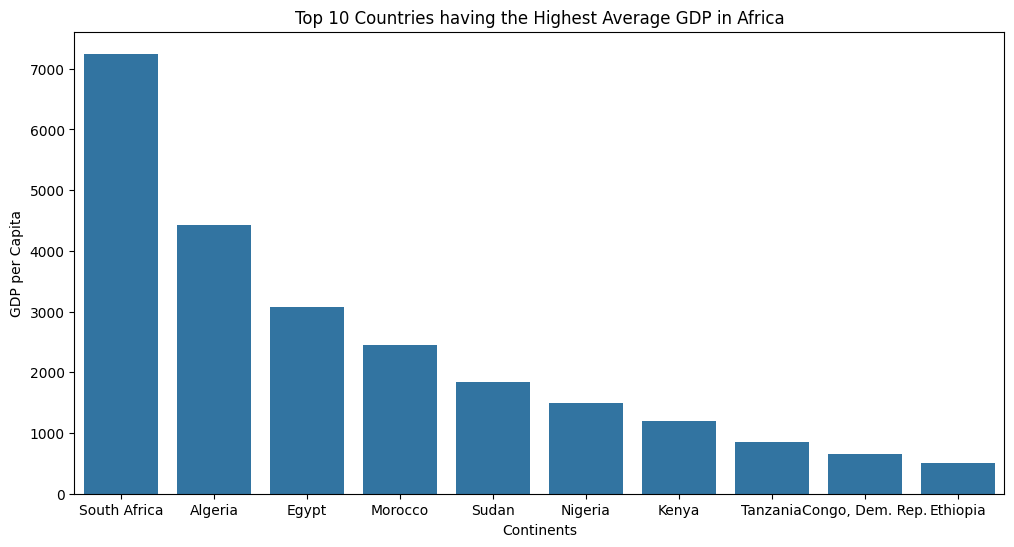

In [49]:
t10pofcgdpcafrica_df = t10pofcafrica_df.sort_values(by='gdp_cap', ascending=False).head(10)
print(t10pofcgdpcafrica_df)
plt.figure(figsize=(12,6))
sns.barplot(data=t10pofcgdpcafrica_df,x='country', y='gdp_cap')
plt.xlabel("Continents")
plt.ylabel("GDP per Capita")
plt.title("Top 10 Countries having the Highest Average GDP in Africa")
plt.show()

South africa has the highest GDP amongst the highly populated countries of Africa

Analysis on Oceania Region

In [50]:
countryoceania_df = data_df.loc[data_df['continent']=='Oceania']
countryoceania_df.head(5)

,country,year,population,continent,life_exp,gdp_cap
60,Australia,1952,8691212,Oceania,69.12,10039.59564
61,Australia,1957,9712569,Oceania,70.33,10949.64959
62,Australia,1962,10794968,Oceania,70.93,12217.22686
63,Australia,1967,11872264,Oceania,71.10,14526.12465
64,Australia,1972,13177000,Oceania,71.93,16788.62948


In [51]:
countryoceania_df['country'].unique()

array(['Australia', 'New Zealand'], dtype=object)

We have two countries that is Australia and New Zealand

In [52]:
countryoceaniaa_df=countryoceania_df.groupby('country')[['life_exp', 'gdp_cap', 'population']].aggregate({'life_exp': 'mean', 'gdp_cap': 'mean','population': 'mean' })
countryoceaniaa_df.head(5)

,life_exp,gdp_cap,population
country,,,
Australia,74.662917,19980.595634,1.464931e+07
New Zealand,73.989500,17262.622813,3.100032e+06


Highly populated country in Oceania

              life_exp       gdp_cap    population
country                                           
Australia    74.662917  19980.595634  1.464931e+07
New Zealand  73.989500  17262.622813  3.100032e+06


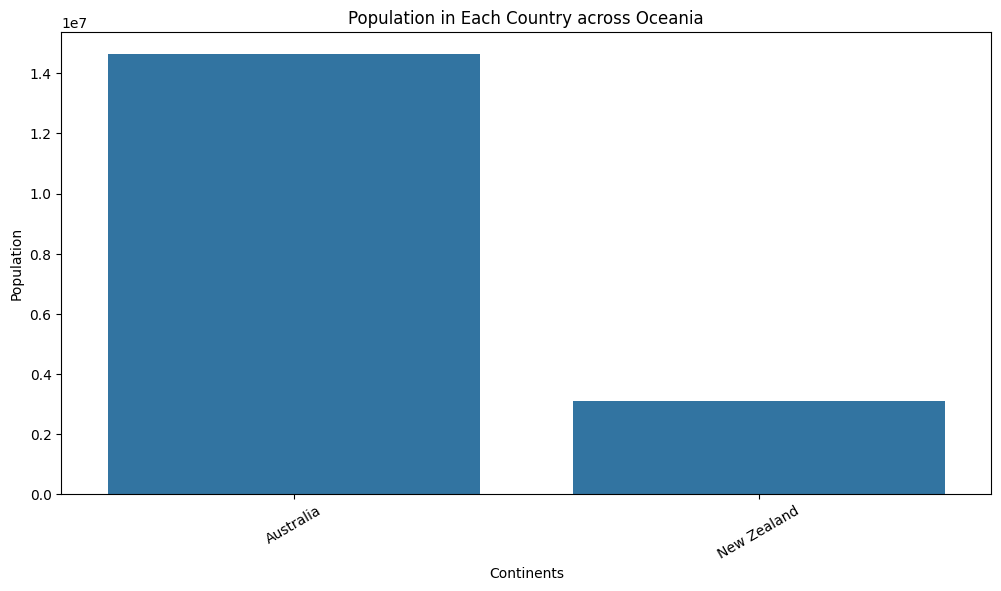

In [53]:
t10pofcoceania_df = countryoceaniaa_df.sort_values(by='population', ascending=False)
print(t10pofcoceania_df)
plt.figure(figsize=(12,6))
sns.barplot(data=t10pofcoceania_df,x='country', y='population')
plt.xlabel("Continents")
plt.ylabel("Population")
plt.xticks(rotation=30)
plt.title("Population in Each Country across Oceania")
plt.show()

We can see that Australia has the highest population Fourteen million, six hundred forty-nine thousand, three hundred ten.

Highest Average Life expectancy

              life_exp       gdp_cap    population
country                                           
Australia    74.662917  19980.595634  1.464931e+07
New Zealand  73.989500  17262.622813  3.100032e+06


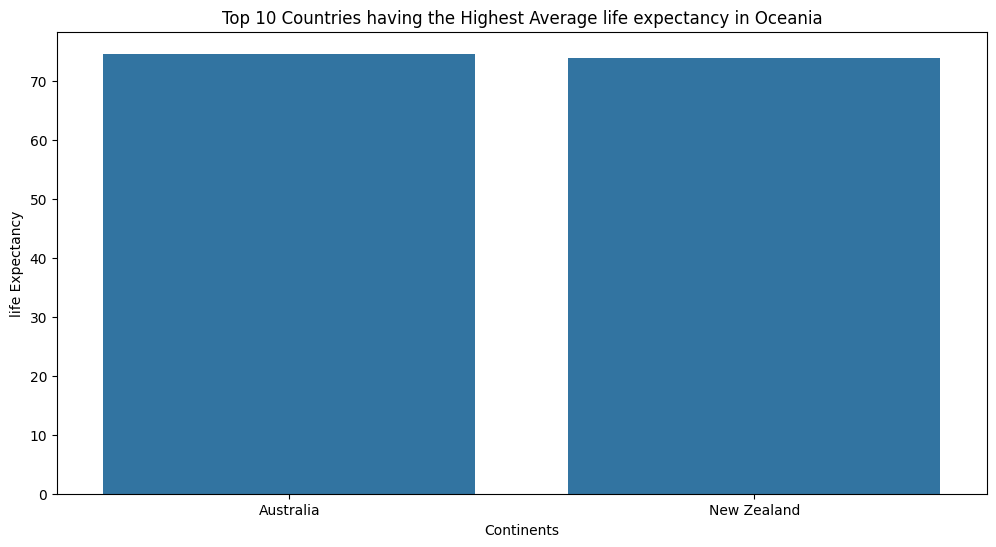

In [54]:
t10poflifeexpoceania_df = countryoceaniaa_df.sort_values(by='life_exp', ascending=False)
print(t10poflifeexpoceania_df)
plt.figure(figsize=(12,6))
sns.barplot(data=t10poflifeexpoceania_df,x='country', y='life_exp')
plt.xlabel("Continents")
plt.ylabel("life Expectancy")
plt.title("Top 10 Countries having the Highest Average life expectancy in Oceania")
plt.show()


Average life expectancy is almost similar but australia has the upper hand of 74.662917

Highest GDP in Oceania

              life_exp       gdp_cap    population
country                                           
Australia    74.662917  19980.595634  1.464931e+07
New Zealand  73.989500  17262.622813  3.100032e+06


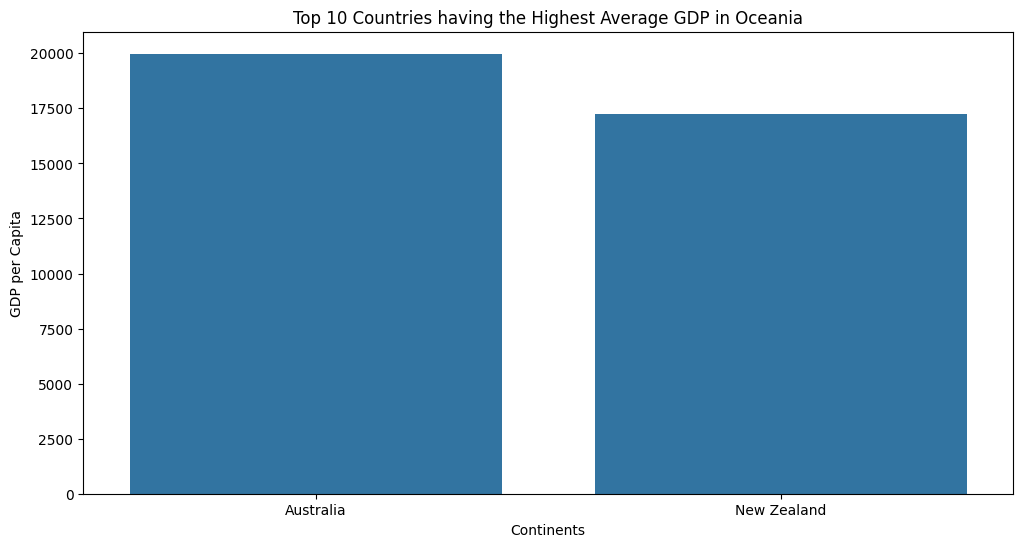

In [55]:
t10pofgdpoceania_df = countryoceaniaa_df.sort_values(by='gdp_cap', ascending=False).head(10)
print(t10pofgdpoceania_df)
plt.figure(figsize=(12,6))
sns.barplot(data=t10pofgdpoceania_df,x='country', y='gdp_cap')
plt.xlabel("Continents")
plt.ylabel("GDP per Capita")
plt.title("Top 10 Countries having the Highest Average GDP in Oceania")
plt.show()


Australia has the highest Average GDP in the Oceania region which is about 19980